In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pyvista as pv 
mesh = pv.read('12673_20170906_083600.vtk')

In [3]:
mesh

StructuredGrid (0x127f25e40)
  N Cells:      12161751
  N Points:     12328960
  X Bounds:     0.000e+00, 2.470e+02
  Y Bounds:     0.000e+00, 1.606e+02
  Z Bounds:     0.000e+00, 1.145e+02
  Dimensions:   344, 224, 160
  N Arrays:     1

In [4]:
type(mesh)

pyvista.core.pointset.StructuredGrid

In [5]:
mesh.point_data

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : None
Active Vectors  : B
Active Texture  : None
Active Normals  : None
Contains arrays :
    B                       float32    (12328960, 3)        VECTORS

In [6]:
mesh.bounds

(0.0, 246.96, 0.0, 160.56, 0.0, 114.48)

In [7]:
xindmax, yindmax, zindmax = mesh.dimensions
mesh.dimensions

(344, 224, 160)

In [8]:
xcenter, ycenter, zcenter = mesh.center
mesh.center

[123.48, 80.28, 57.24]

In [9]:
mesh.points

pyvista_ndarray([[  0.  ,   0.  ,   0.  ],
                 [  0.72,   0.  ,   0.  ],
                 [  1.44,   0.  ,   0.  ],
                 ...,
                 [245.52, 160.56, 114.48],
                 [246.24, 160.56, 114.48],
                 [246.96, 160.56, 114.48]])

In [10]:
mesh['B']

pyvista_ndarray([[ -8.66039,  64.998  , -59.5057 ],
                 [-12.4612 ,  63.478  , -55.2934 ],
                 [-15.4362 ,  62.0699 , -51.2414 ],
                 ...,
                 [  1.73023,   3.53392,   1.37877],
                 [  1.77657,   3.68637,   1.36052],
                 [  1.81803,   3.84065,   1.34077]], dtype=float32)

In [11]:
slices = mesh.slice_orthogonal(z=10)
slices

MultiBlock (0x127f27a00)
  N Blocks:	3
  X Bounds:	0.000, 246.960
  Y Bounds:	0.000, 160.560
  Z Bounds:	0.000, 114.480

In [12]:
mesh

StructuredGrid (0x127f25e40)
  N Cells:      12161751
  N Points:     12328960
  X Bounds:     0.000e+00, 2.470e+02
  Y Bounds:     0.000e+00, 1.606e+02
  Z Bounds:     0.000e+00, 1.145e+02
  Dimensions:   344, 224, 160
  N Arrays:     1

In [13]:
p = pv.Plotter()
p.add_mesh(mesh.outline())
p.camera_position = 'xz'
p.camera.azimuth = 30
p.camera.elevation = 30
# p.show_grid()
p.show_bounds()
sargs = dict(
    title='Bz [G]',
    title_font_size=15,
    height=0.25,
    width=0.05,
    vertical=True,
    position_x = 0.05,
    position_y = 0.05,
)
p.add_mesh(mesh.extract_subset((0, xindmax, 0, yindmax, 0, 0)), 
           cmap='gray', scalars='B', component=2, clim=(-3000, 3000), 
           scalar_bar_args=sargs, show_scalar_bar=True, lighting=False)

p.add_mesh(slices, cmap='gray', scalars='B', clim=(0, 300))
p.show()

Widget(value="<iframe src='http://localhost:50916/index.html?ui=P_0x127f7ab30_0&reconnect=auto' style='width: …

In [14]:
mesh

StructuredGrid (0x127f25e40)
  N Cells:      12161751
  N Points:     12328960
  X Bounds:     0.000e+00, 2.470e+02
  Y Bounds:     0.000e+00, 1.606e+02
  Z Bounds:     0.000e+00, 1.145e+02
  Dimensions:   344, 224, 160
  N Arrays:     1

In [15]:
mesh_g = mesh.compute_derivative(scalars='B')
mesh_g

StructuredGrid (0x12e3a9a80)
  N Cells:      12161751
  N Points:     12328960
  X Bounds:     0.000e+00, 2.470e+02
  Y Bounds:     0.000e+00, 1.606e+02
  Z Bounds:     0.000e+00, 1.145e+02
  Dimensions:   344, 224, 160
  N Arrays:     2

In [16]:
def gradients_to_dict(arr):
    keys = np.array(
        ["dBx/dx", "dBx/dy", "dBx/dz", "dBy/dx", "dBy/dy", "dBy/dz", "dBz/dx", "dBz/dy", "dBz/dz"]
    )
    keys = keys.reshape((3,3))[:, : arr.shape[1]].ravel()
    return dict(zip(keys, mesh_g['gradient'].T))

gradients = gradients_to_dict(mesh_g['gradient'])
gradients

{'dBx/dx': pyvista_ndarray([-5.2789025 , -4.705424  , -3.4543746 , ...,  0.06681946,
                   0.06097224,  0.05758338], dtype=float32),
 'dBx/dy': pyvista_ndarray([-1.8289447 , -1.2670835 , -0.6294436 , ..., -0.03713899,
                  -0.03602786, -0.03640271], dtype=float32),
 'dBx/dz': pyvista_ndarray([4.7029443 , 5.4604306 , 5.8730564 , ..., 0.25108325,
                  0.26430553, 0.2745973 ], dtype=float32),
 'dBy/dx': pyvista_ndarray([-2.1111116 , -2.0334032 , -1.7797232 , ...,  0.20871526,
                   0.21300697,  0.21427804], dtype=float32),
 'dBy/dy': pyvista_ndarray([ 0.516669  ,  1.327912  ,  2.0049996 , ..., -0.12881921,
                  -0.12636119, -0.12556943], dtype=float32),
 'dBy/dz': pyvista_ndarray([-8.253612  , -7.5345836 , -6.861528  , ...,  0.02112521,
                   0.02384716,  0.0239306 ], dtype=float32),
 'dBz/dx': pyvista_ndarray([ 5.8504157 ,  5.7390957 ,  5.4179163 , ..., -0.02368051,
                  -0.02638888, -0.02743055], 

In [17]:
curlB_x = gradients['dBz/dy'] - gradients['dBy/dz']
curlB_y = gradients['dBx/dz'] - gradients['dBz/dx']
curlB_z = gradients['dBy/dx'] - gradients['dBx/dy']

curlB = np.vstack([curlB_x, curlB_y, curlB_z]).T
curlB

array([[-2.1559763 , -1.1474714 , -0.28216696],
       [-2.152083  , -0.27866507, -0.76631963],
       [-2.1420798 ,  0.4551401 , -1.1502795 ],
       ...,
       [-0.00477797,  0.27476376,  0.24585426],
       [-0.00856933,  0.29069442,  0.24903484],
       [-0.01009719,  0.30202785,  0.25068074]], dtype=float32)

In [18]:
# mesh_g.point_data.update(gradients)
mesh.point_data['curlB'] = curlB
mesh

StructuredGrid (0x127f25e40)
  N Cells:      12161751
  N Points:     12328960
  X Bounds:     0.000e+00, 2.470e+02
  Y Bounds:     0.000e+00, 1.606e+02
  Z Bounds:     0.000e+00, 1.145e+02
  Dimensions:   344, 224, 160
  N Arrays:     2

In [19]:
mesh.point_data

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : curlB
Active Vectors  : B
Active Texture  : None
Active Normals  : None
Contains arrays :
    B                       float32    (12328960, 3)        VECTORS
    curlB                   float32    (12328960, 3)        SCALARS

In [20]:
streamlines, src = mesh.streamlines(
    return_source=True,
    # source_center=(xcenter, ycenter, 0),
    # source_radius=10,
    # n_points=10,
    integration_direction='both',
    max_time=1000,
)
streamlines

PolyData (0x12e3da860)
  N Cells:    200
  N Points:   22496
  N Strips:   0
  X Bounds:   4.145e-03, 1.984e+02
  Y Bounds:   2.072e+01, 1.604e+02
  Z Bounds:   1.096e-02, 1.144e+02
  N Arrays:   9

In [21]:
p = pv.Plotter()
p.add_mesh(mesh.outline())
p.camera_position = 'xz'
p.camera.azimuth = 30
p.camera.elevation = 30
# p.camera_position = 'xy'
# p.show_grid()
p.show_bounds()
sargs1 = dict(
    title='Bz [G]',
    title_font_size=15,
    height=0.25,
    width=0.05,
    vertical=True,
    position_x = 0.05,
    position_y = 0.05,
)
sargs2 = dict(
    title='J = curl(B)',
    title_font_size=15,
    height=0.25,
    width=0.05,
    vertical=True,
    position_x = 0.9,
    position_y = 0.05,
)

dargs2 = dict(
    scalars='curlB', 
    clim=(0, 500),
    scalar_bar_args=sargs2, 
    show_scalar_bar=True, 
    lighting=False
)


p.add_mesh(mesh.extract_subset((0, xindmax, 0, yindmax, 0, 0)), 
           cmap='gray', scalars='B', component=2, clim=(-3000, 3000), 
           scalar_bar_args=sargs1, show_scalar_bar=True, lighting=False)

p.add_mesh(src, point_size=10)
p.add_mesh(streamlines.tube(radius=0.2), 
           cmap='coolwarm', **dargs2)
p.show()

Widget(value="<iframe src='http://localhost:50916/index.html?ui=P_0x127f7b0a0_1&reconnect=auto' style='width: …

In [22]:
p = pv.Plotter()
p.add_mesh(mesh.outline())
p.camera_position = 'xz'
p.camera.azimuth = 30
p.camera.elevation = 30
# p.camera_position = 'xy'
# p.show_grid()
p.show_bounds()
sargs1 = dict(
    title='J = curl(B)',
    title_font_size=15,
    height=0.25,
    width=0.05,
    vertical=True,
    position_x = 0.05,
    position_y = 0.05,
)

dargs1 = dict(
    cmap='viridis',
    scalars='curlB', 
    clim=(0, 1000),
    scalar_bar_args=sargs1, 
    show_scalar_bar=True, 
    lighting=False
)

sargs2 = dict(
    title='J',
    title_font_size=15,
    height=0.25,
    width=0.05,
    vertical=True,
    position_x = 0.9,
    position_y = 0.05,
)

dargs2 = dict(
    cmap='coolwarm',
    scalars='curlB', 
    clim=(0, 500),
    scalar_bar_args=sargs2, 
    show_scalar_bar=True, 
    lighting=False
)

p.add_mesh(mesh.extract_subset((0, xindmax, 0, yindmax, 0, 0)), 
           **dargs1)

# p.add_mesh(src, point_size=10)
# p.add_mesh(streamlines.tube(radius=0.2), 
#            **dargs2)
p.show()

Widget(value="<iframe src='http://localhost:50916/index.html?ui=P_0x12e36e140_2&reconnect=auto' style='width: …

In [23]:
b = mesh_g['B']
bx, by, bz = b[:,0], b[:,1], b[:,2]

(344, 224, 160)


Text(0, 0.5, 'y')

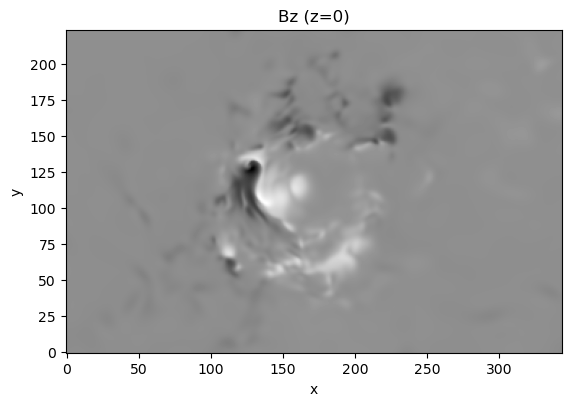

In [24]:
bz_re = bz.reshape((zindmax, yindmax, xindmax))
bz_re = bz_re.transpose((2, 1, 0))
print(np.shape(bz_re))
plt.imshow(bz_re[..., 0].transpose(), origin='lower', cmap='gray')
plt.title('Bz (z=0)')
plt.xlabel('x')
plt.ylabel('y')

In [25]:
def curl(b_field):  # (x, y, z)
    _, dFx_dy, dFx_dz = np.gradient(b_field[..., 0], axis=[0, 1, 2], edge_order=2)
    dFy_dx, _, dFy_dz = np.gradient(b_field[..., 1], axis=[0, 1, 2], edge_order=2)
    dFz_dx, dFz_dy, _ = np.gradient(b_field[..., 2], axis=[0, 1, 2], edge_order=2)

    rot_x = dFz_dy - dFy_dz
    rot_y = dFx_dz - dFz_dx
    rot_z = dFy_dx - dFx_dy

    return np.stack([rot_x, rot_y, rot_z], -1)

In [26]:
def vector_norm(vector):
    return np.sqrt((vector ** 2).sum(-1))

In [27]:
bx_re = bx.reshape((zindmax, yindmax, xindmax))
bx_re = bx_re.transpose((2, 1, 0))
by_re = by.reshape((zindmax, yindmax, xindmax))
by_re = by_re.transpose((2, 1, 0))

b_re = np.stack([bx_re, by_re, bz_re], -1)
np.array_equal(b_re[..., 0], bx_re)
print(np.shape(b_re))

(344, 224, 160, 3)


(344, 224, 160, 3)
(344, 224, 160)


Text(0, 0.5, 'y')

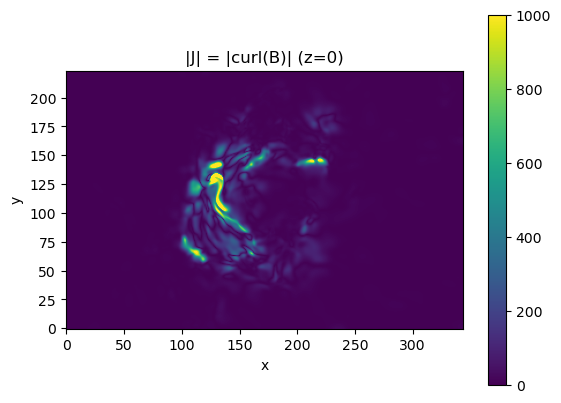

In [28]:
j = curl(b_re)
print(np.shape(j))
j_norm = vector_norm(j)
print(np.shape(j_norm))

im = plt.imshow(j_norm[..., 0].transpose(), origin='lower', cmap='viridis', clim=(0, 1000))
plt.colorbar(im)
plt.title('|J| = |curl(B)| (z=0)')
plt.xlabel('x')
plt.ylabel('y')